In [14]:
#importing any dependencies needed
import pandas as pd
import numpy as np 
import requests
import json
from pprint import pprint
from config import key_dict
from datetime import datetime
import time
import gmaps
import matplotlib.pyplot as plt
import os
import csv

In [15]:
#read in csv data
data = "aqi_data.csv"

In [16]:
#create df for data
sd_atmosphere = pd.read_csv(data)
sd_atmosphere

,Date,Overall AQI Value,Main Pollutant,Site Name (of Overall AQI),Site ID (of Overall AQI),Source (of Overall AQI),CO,Ozone,SO2,PM10,PM25,NO2
0,1/1/2018,139,PM2.5,Donovan,06-073-1014,AQS,11,54,0,.,139,33
1,1/2/2018,94,PM2.5,Donovan,06-073-1014,AQS,15,48,0,48,94,47
2,1/3/2018,94,PM2.5,Chula Vista,06-073-0001,AQS,14,40,0,.,94,42
3,1/4/2018,76,PM2.5,Donovan,06-073-1014,AQS,15,44,0,.,76,49
4,1/5/2018,78,PM2.5,Donovan,06-073-1014,AQS,16,35,0,26,78,43
...,...,...,...,...,...,...,...,...,...,...,...,...
1171,3/20/2021,42,Ozone,Chula Vista,06-073-0001,AirNow,NaN,42,NaN,NaN,23,NaN
1172,3/21/2021,48,Ozone,Alpine,06-073-1006,AirNow,NaN,48,NaN,NaN,44,NaN
1173,3/22/2021,50,Ozone,Alpine,06-073-1006,AirNow,NaN,50,NaN,NaN,48,NaN
1174,3/23/2021,44,Ozone,Alpine,06-073-1006,AirNow,NaN,44,NaN,NaN,42,NaN


In [19]:
#drop any rows w missing data
#change any strings to None 
clean_aqi_df = sd_atmosphere.dropna(how = 'any')
clean_aqi_df = clean_aqi_df.replace('.', None)

In [20]:
#needed to cast data as float so it could be graphed
clean_aqi_df["CO"] = clean_aqi_df["CO"].astype(float)

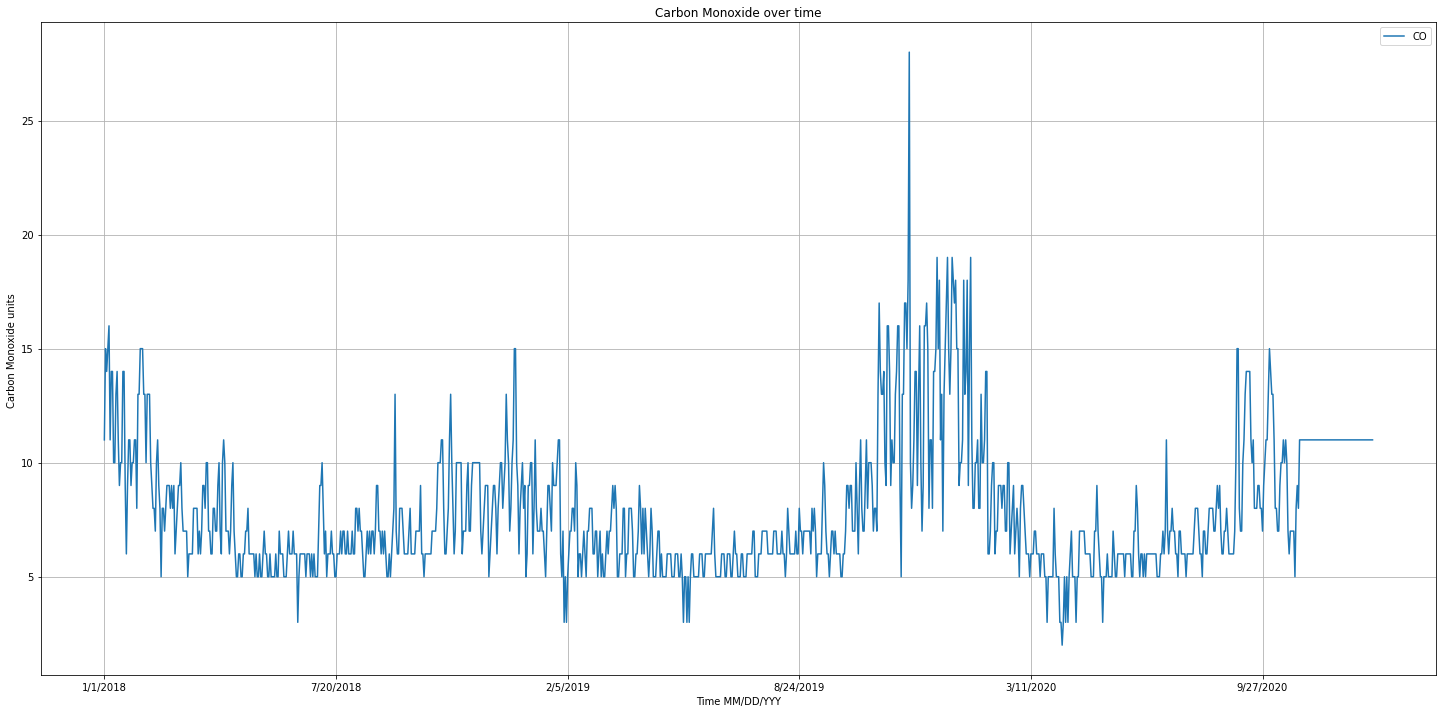

In [46]:
#create CO in atmosphere over time graph
clean_aqi_df.plot(kind="line", x="Date", y="CO", grid=True, figsize=(25,12),
              title="Carbon Monoxide over time")
plt.xlabel("Time MM/DD/YYY")
plt.ylabel("Carbon Monoxide units ")
plt.savefig("CO_over_time.png")

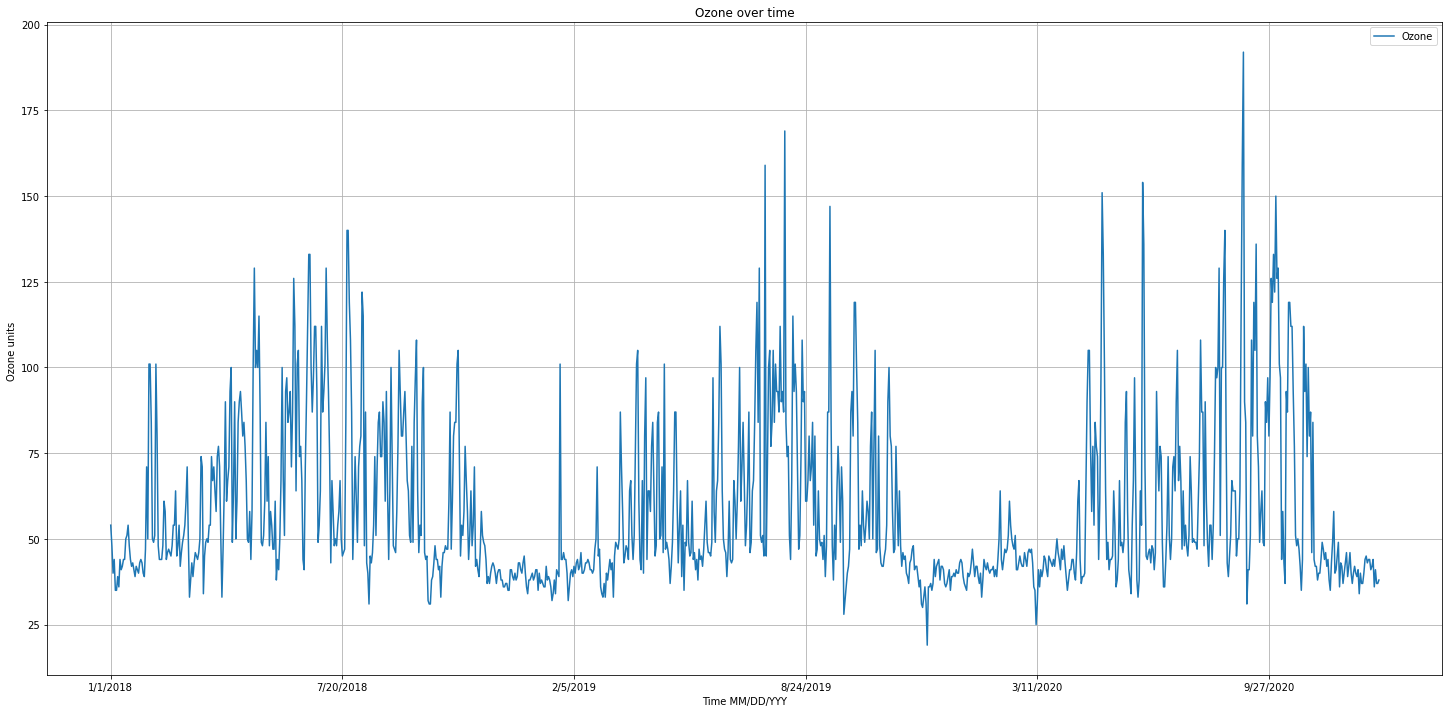

In [47]:
#create Ozone over time graph
clean_aqi_df.plot(kind="line", x="Date", y="Ozone", grid=True, figsize=(25,12),
              title="Ozone over time")
plt.xlabel("Time MM/DD/YYY")
plt.ylabel("Ozone units ")
plt.savefig("Ozone_over_time.png")

In [24]:
#casting SO2 data as float to graph
clean_aqi_df["SO2"] = clean_aqi_df["SO2"].astype(float)

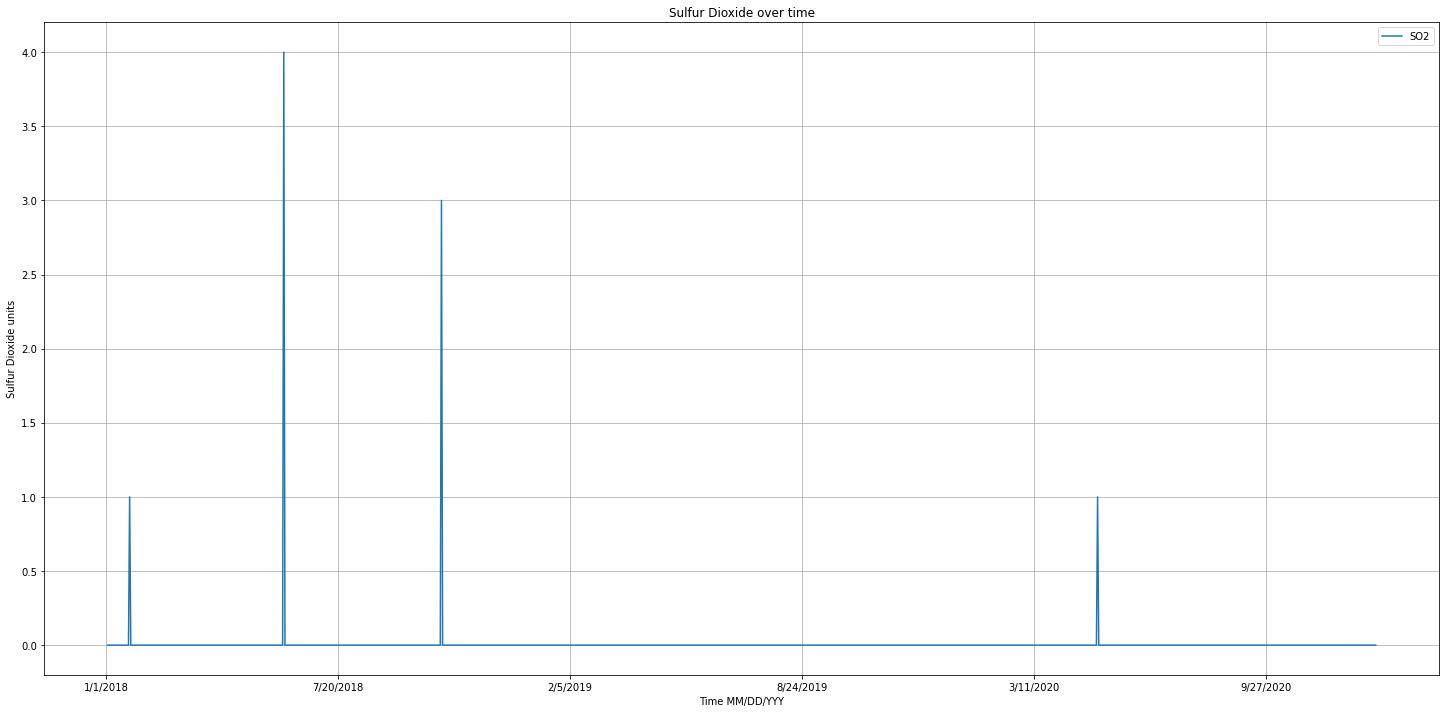

In [48]:
clean_aqi_df.plot(kind="line", x="Date", y="SO2", grid=True, figsize=(25,12),
              title="Sulfur Dioxide over time")
plt.xlabel("Time MM/DD/YYY")
plt.ylabel("Sulfur Dioxide units")
plt.savefig("SO2_over_time.png")

In [26]:
#something is going on with a period in the PM10 column
#working to fix that 
clean_aqi_df.loc[clean_aqi_df["PM10"] == '.']

,Date,Overall AQI Value,Main Pollutant,Site Name (of Overall AQI),Site ID (of Overall AQI),Source (of Overall AQI),CO,Ozone,SO2,PM10,PM25,NO2
0,1/1/2018,139,PM2.5,Donovan,06-073-1014,AQS,11.0,54,0.0,.,139,33


In [38]:
#replace that period as None
#clean_aqi_df["PM10"] = clean_aqi_df["PM10"].replace('.', None)
clean_aqi_df.iloc[0,9] = None

In [39]:
#caste as float to plot 
clean_aqi_df["PM10"] = clean_aqi_df["PM10"].astype(float)

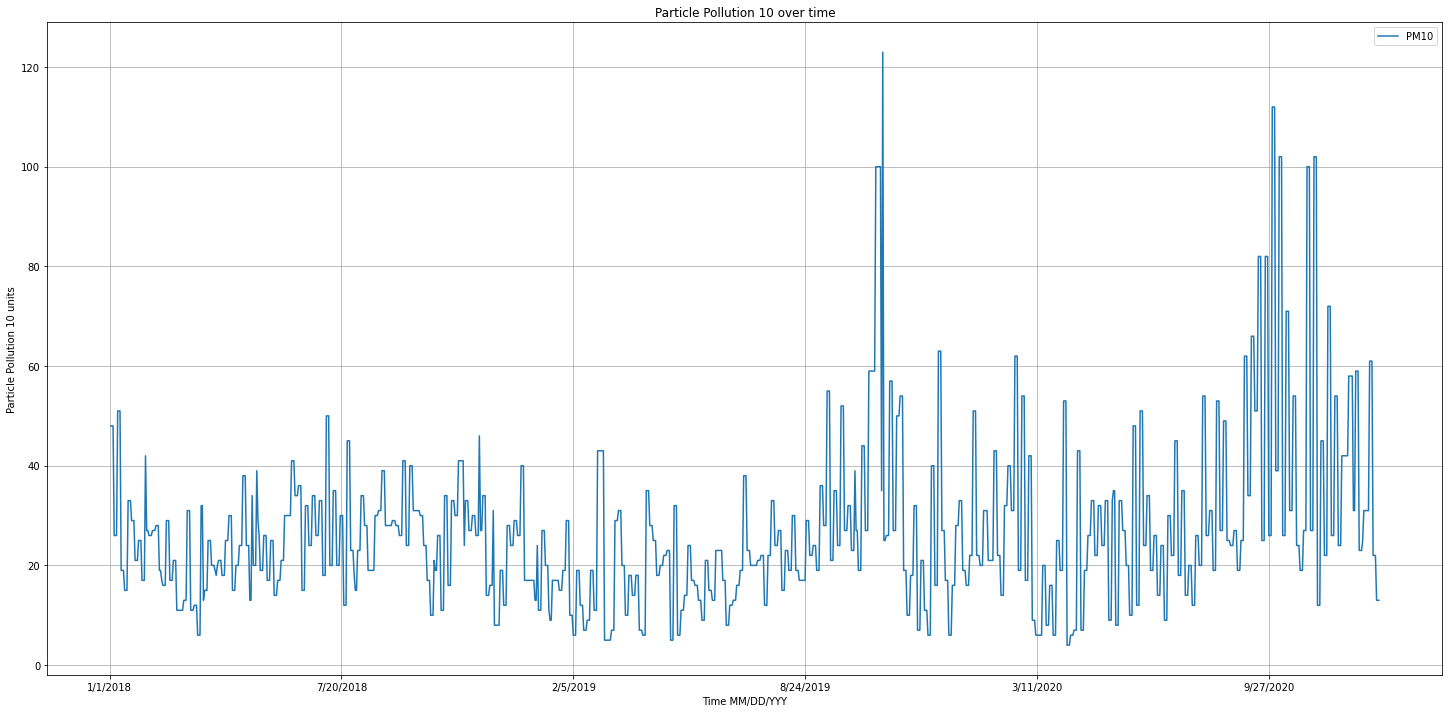

In [49]:
#plot PM10 data
clean_aqi_df.plot(kind="line", x="Date", y="PM10", grid=True, figsize=(25,12),
              title="Particle Pollution 10 over time")
plt.xlabel("Time MM/DD/YYY")
plt.ylabel("Particle Pollution 10 units")
plt.savefig("PM10_over_time.png")